In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [157]:
titanic_dataset = pd.read_csv('datasets/train.csv', header=None)
titanic_dataset.columns = ['passenger_id', 
           'survived', 'ticket_class', 'name', 
           'sex', 'age', 'sib_sp', 'par_ch', 
           'ticket_number', 'fare', 'cabin',
           'embarked']
titanic_dataset = titanic_dataset[1:] # Exclude the column names row

print(titanic_dataset.shape)
titanic_dataset.head(15)


(891, 12)


,passenger_id,survived,ticket_class,name,sex,age,sib_sp,par_ch,ticket_number,fare,cabin,embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
6,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,NaN,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


TODO: LATER: 'passenger_id' and 'name' are unlikely to be predictive features and can be therefore dropped:

In [158]:
#titanic_dataset.drop(['passenger_id', 'name'], axis=1, inplace=True)
#print(titanic_dataset.shape)
#titanic_dataset.head(15)

In [159]:
print(titanic_dataset['passenger_id'].unique().shape)
print(titanic_dataset.shape)

(891,)
(891, 12)


Apparently, there is no passeger_id duplicates

Check types in columns:

In [160]:
titanic_dataset.dtypes

passenger_id     object
survived         object
ticket_class     object
name             object
sex              object
age              object
sib_sp           object
par_ch           object
ticket_number    object
fare             object
cabin            object
embarked         object
dtype: object

All columns have a type 'object', which for numeric columns suggests that there are cells that do not belong or are empty.<br/>

<h3>Handling categorical variables</h3>
<br/>
'survived' must always be in [0, 1], 'ticket_class' in [1, 2, 3], sex in ['male', 'female'], and 'embarked' in ['C', 'Q', 'S']

In [161]:
categorical_columns = ['survived', 'ticket_class', 'sex', 'embarked']

for col in titanic_dataset[categorical_columns]:
    print("\'%s\' column contains %s distinct values: %s" % (str(col), titanic_dataset[col].unique().shape[0], titanic_dataset[col].unique()))

'survived' column contains 2 distinct values: ['0' '1']
'ticket_class' column contains 3 distinct values: ['3' '1' '2']
'sex' column contains 2 distinct values: ['male' 'female']
'embarked' column contains 4 distinct values: ['S' 'C' 'Q' nan]


Check how many nan cells are there in 'embarked':

In [162]:
print(titanic_dataset[titanic_dataset['embarked'].isnull()])
titanic_dataset.shape

    passenger_id survived ticket_class  \
62            62        1            1   
830          830        1            1   

                                          name     sex age sib_sp par_ch  \
62                         Icard, Miss. Amelie  female  38      0      0   
830  Stone, Mrs. George Nelson (Martha Evelyn)  female  62      0      0   

    ticket_number fare cabin embarked  
62         113572   80   B28      NaN  
830        113572   80   B28      NaN  


(891, 12)

There are only 2 empty rows, so we can delete those records without losing much information:

In [163]:
titanic_dataset = titanic_dataset[titanic_dataset['embarked'].notnull()]
titanic_dataset.shape

(889, 12)

One-hot encode categorical variables
(and drop the initial columns):

In [164]:
categorical_columns = ['ticket_class', 'sex', 'embarked']
for col in categorical_columns:
    one_hot = pd.get_dummies(titanic_dataset[[col]])
    titanic_dataset.drop([col], axis=1, inplace=True)
    titanic_dataset = titanic_dataset.join(one_hot)
    
titanic_dataset.head(20)

,passenger_id,survived,name,age,sib_sp,par_ch,ticket_number,fare,cabin,ticket_class_1,ticket_class_2,ticket_class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.25,NaN,0,0,1,0,1,0,0,1
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
3,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.925,NaN,0,0,1,1,0,0,0,1
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1,C123,1,0,0,1,0,0,0,1
5,5,0,"Allen, Mr. William Henry",35,0,0,373450,8.05,NaN,0,0,1,0,1,0,0,1
6,6,0,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,0,0,1,0,1,0,1,0
7,7,0,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,1,0,0,0,1,0,0,1
8,8,0,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.075,NaN,0,0,1,0,1,0,0,1
9,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27,0,2,347742,11.1333,NaN,0,0,1,1,0,0,0,1
10,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14,1,0,237736,30.0708,NaN,0,1,0,1,0,1,0,0


Evaluate what part cabin numbers is missing:

In [165]:
cabin_nans_count = titanic_dataset[titanic_dataset['cabin'].isnull()].shape[0] 
overall_count = titanic_dataset.shape[0]

print(float(cabin_nans_count)/float(overall_count))

0.7727784027


<h3>Handling numeric variables</h3>

~77% of the values for cabin number are missing. Though this column may contain useful information, we can drop it to simplify things for now:

In [166]:
titanic_dataset.drop(['cabin'], axis=1, inplace=True)

titanic_dataset.head(20)

,passenger_id,survived,name,age,sib_sp,par_ch,ticket_number,fare,ticket_class_1,ticket_class_2,ticket_class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.25,0,0,1,0,1,0,0,1
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0
3,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.925,0,0,1,1,0,0,0,1
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1,1,0,0,1,0,0,0,1
5,5,0,"Allen, Mr. William Henry",35,0,0,373450,8.05,0,0,1,0,1,0,0,1
6,6,0,"Moran, Mr. James",NaN,0,0,330877,8.4583,0,0,1,0,1,0,1,0
7,7,0,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,1,0,0,0,1,0,0,1
8,8,0,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.075,0,0,1,0,1,0,0,1
9,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27,0,2,347742,11.1333,0,0,1,1,0,0,0,1
10,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14,1,0,237736,30.0708,0,1,0,1,0,1,0,0


Handle age column:

In [167]:
titanic_dataset[titanic_dataset['age'].isnull()].shape[0]

177

Many age records are missing, but age may be crucial for the result, so nan records should be replaced with some value.<br/>
Fill missing ages with median ages for each sex:

In [168]:
# Convert age to a numpy float column and use this version in the dataset
age_np = titanic_dataset.as_matrix(['age']).astype(float)
titanic_dataset['age'] = age_np

# Find medians for known ages
titanic_dataset_with_known_ages = titanic_dataset[titanic_dataset['age'].notnull()]
female_age_median = titanic_dataset_with_known_ages[titanic_dataset_with_known_ages['sex_female']==1].age.median()
male_age_median = titanic_dataset_with_known_ages[titanic_dataset_with_known_ages['sex_male']==1].age.median()

# For each gender, fill their missing age cells with this gender's median age
titanic_dataset.loc[(titanic_dataset['sex_female']==1) & (titanic_dataset['age'].isnull()), ['age']] = female_age_median
titanic_dataset.loc[(titanic_dataset['sex_male']==1) & (titanic_dataset['age'].isnull()), ['age']] = male_age_median

print(titanic_dataset['age'].isnull().any())

titanic_dataset.head(20)


/home/grigori/anaconda3/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


False


,passenger_id,survived,name,age,sib_sp,par_ch,ticket_number,fare,ticket_class_1,ticket_class_2,ticket_class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,0,0,1,0,1,0,0,1
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0
3,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,0,0,1,1,0,0,0,1
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,1,0,0,1,0,0,0,1
5,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,0,0,1,0,1,0,0,1
6,6,0,"Moran, Mr. James",29.0,0,0,330877,8.4583,0,0,1,0,1,0,1,0
7,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,0,0,0,1,0,0,1
8,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.075,0,0,1,0,1,0,0,1
9,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,0,0,1,1,0,0,0,1
10,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,0,1,0,1,0,1,0,0


<h4>Interpreting and dividing sib_sp (number of sibilings of spouses that the passenger is travelling with)</h4>

<ul>
    <li>According to the U.S. Bureau of the Census, median marriage age in 1910 was <b>25.1</b> for men and <b>21.6</b> for women.</li>
    <li>Though most Titanic passengers were British, those ages should be similar.</li>
</ul>

Assumptions:

<ol>
    <li>Most people don't have more than 1 spouse. If sib_sp > 1, the passenger travels with at most 1 spouse and at least n-1 sibilings</li>
    <li>People are much more likely to go on a transatlantic cruise with their spouses, rather than with their sibilings</li>
    <li>Passengers whose age is less than 20 (cutoff_age), are travelling with sibilings, rather than with spouses</li>
</ol>
Based on these assumptions, introduce 2 new features: 'sibilings' and 'spouse':

In [169]:
sib_sp_np = titanic_dataset.as_matrix(['sib_sp']).astype(int)

titanic_dataset['sibilings'] = np.nan
titanic_dataset['spouse'] = np.nan

sibilings_np = np.zeros(titanic_dataset['sibilings'].shape)
spouse_np = np.zeros(titanic_dataset['spouse'].shape)

cutoff_age = 20

for i in range(age_np.shape[0]):
    if age_np[i] < cutoff_age:
        sibilings_np[i] = sib_sp_np[i]
        spouse_np[i] = 0
    elif age_np[i] >= cutoff_age and sib_sp_np[i] == 0:
        sibilings_np[i] = 0
        spouse_np[i] = 0
    elif age_np[i] >= cutoff_age and sib_sp_np[i] >= 1:
        sibilings_np[i] = sib_sp_np[i]-1
        spouse_np[i] = 1
        
titanic_dataset['sibilings'] = sibilings_np
titanic_dataset['spouse'] = spouse_np

titanic_dataset.head(20)

/home/grigori/anaconda3/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,passenger_id,survived,name,age,sib_sp,par_ch,ticket_number,fare,ticket_class_1,ticket_class_2,ticket_class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,sibilings,spouse
1,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,0,0,1,0,1,0,0,1,0.0,1.0
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0,0.0,1.0
3,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,0,0,1,1,0,0,0,1,0.0,0.0
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,1,0,0,1,0,0,0,1,0.0,1.0
5,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,0,0,1,0,1,0,0,1,0.0,0.0
6,6,0,"Moran, Mr. James",29.0,0,0,330877,8.4583,0,0,1,0,1,0,1,0,0.0,0.0
7,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,0,0,0,1,0,0,1,0.0,0.0
8,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.075,0,0,1,0,1,0,0,1,3.0,0.0
9,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,0,0,1,1,0,0,0,1,0.0,0.0
10,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,0,1,0,1,0,1,0,0,1.0,0.0


In [170]:
for col in titanic_dataset.columns:
    print(titanic_dataset[col].isnull().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


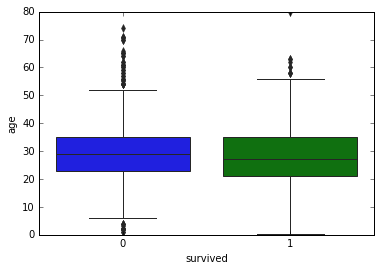

In [171]:
sns.boxplot(titanic_dataset['survived'], titanic_dataset['age'])
plt.show()
#plt.hist(titanic_dataset['age'], titanic_dataset['survived'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90])
#plt.show()

In [172]:
males_died = titanic_dataset[(titanic_dataset['sex_male']==1) & (titanic_dataset['survived']=='0')].count()[0]
females_died = titanic_dataset[(titanic_dataset['sex_female']==1) & (titanic_dataset['survived']=='0')].count()[0]

males_survived = titanic_dataset[(titanic_dataset['sex_male']==1) & (titanic_dataset['survived']=='1')].count()[0]
females_survived = titanic_dataset[(titanic_dataset['sex_female']==1) & (titanic_dataset['survived']=='1')].count()[0]

total_males = males_died + males_survived
total_females = females_died + females_survived

males_survived_percentage = males_survived*100/total_males
females_survived_percentage = females_survived*100/total_females

print("%s people died" % (titanic_dataset[titanic_dataset['survived']=='0'].count()[0]))
print("%s males" % (males_died))
print("%s females" % (females_died))

print("\n")

print("%s people survived" % (titanic_dataset[titanic_dataset['survived']=='1'].count()[0]))
print("%s males" % (males_survived))
print("%s females" % (females_survived))

print("\n")

print("%s total males" % (total_males))
print("%s total females" % (total_females))

print("\n")

print("%s percent males survived" % (males_survived_percentage))
print("%s percent females survived" % (females_survived_percentage))

549 people died
468 males
81 females


340 people survived
109 males
231 females


577 total males
312 total females


18 percent males survived
74 percent females survived


Sex is an important factor in having survived

Divide names into parts:

In [173]:
titanic_dataset.head(20)

,passenger_id,survived,name,age,sib_sp,par_ch,ticket_number,fare,ticket_class_1,ticket_class_2,ticket_class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,sibilings,spouse
1,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,0,0,1,0,1,0,0,1,0.0,1.0
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0,0.0,1.0
3,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,0,0,1,1,0,0,0,1,0.0,0.0
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,1,0,0,1,0,0,0,1,0.0,1.0
5,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,0,0,1,0,1,0,0,1,0.0,0.0
6,6,0,"Moran, Mr. James",29.0,0,0,330877,8.4583,0,0,1,0,1,0,1,0,0.0,0.0
7,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,0,0,0,1,0,0,1,0.0,0.0
8,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.075,0,0,1,0,1,0,0,1,3.0,0.0
9,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,0,0,1,1,0,0,0,1,0.0,0.0
10,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,0,1,0,1,0,1,0,0,1.0,0.0


In [174]:
import re
# Find and extract the honorific which is a first word after first comma in a name cell
titanic_dataset['honorifics'] = titanic_dataset['name'].map(lambda name: re.compile(',\s[A-Za-z]+').search(name).group())
# Get rif of that comma and space
titanic_dataset['honorifics'] = titanic_dataset['honorifics'].map(lambda cell: re.compile('[A-Za-z]+').search(cell).group())

# drop the name column
titanic_dataset.drop(['name'], axis=1, inplace=True)

titanic_dataset.head(50)

,passenger_id,survived,age,sib_sp,par_ch,ticket_number,fare,ticket_class_1,ticket_class_2,ticket_class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,sibilings,spouse,honorifics
1,1,0,22.0,1,0,A/5 21171,7.25,0,0,1,0,1,0,0,1,0.0,1.0,Mr
2,2,1,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0,0.0,1.0,Mrs
3,3,1,26.0,0,0,STON/O2. 3101282,7.925,0,0,1,1,0,0,0,1,0.0,0.0,Miss
4,4,1,35.0,1,0,113803,53.1,1,0,0,1,0,0,0,1,0.0,1.0,Mrs
5,5,0,35.0,0,0,373450,8.05,0,0,1,0,1,0,0,1,0.0,0.0,Mr
6,6,0,29.0,0,0,330877,8.4583,0,0,1,0,1,0,1,0,0.0,0.0,Mr
7,7,0,54.0,0,0,17463,51.8625,1,0,0,0,1,0,0,1,0.0,0.0,Mr
8,8,0,2.0,3,1,349909,21.075,0,0,1,0,1,0,0,1,3.0,0.0,Master
9,9,1,27.0,0,2,347742,11.1333,0,0,1,1,0,0,0,1,0.0,0.0,Mrs
10,10,1,14.0,1,0,237736,30.0708,0,1,0,1,0,1,0,0,1.0,0.0,Mrs


Delete the alphanumeric part of ticket numbers:

In [175]:
def extract_ticket_number(full_number):
    matched_number = re.compile('[0-9]+$').search(full_number)
    if matched_number:
        return matched_number.group()
    else:
        # For the tickets that don't have numbers, but only alphanumeric part
        return '-1'

titanic_dataset['ticket_number'] = titanic_dataset['ticket_number'].map(lambda number: extract_ticket_number(number)).astype(np.int)


titanic_dataset.head(50)

,passenger_id,survived,age,sib_sp,par_ch,ticket_number,fare,ticket_class_1,ticket_class_2,ticket_class_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,sibilings,spouse,honorifics
1,1,0,22.0,1,0,21171,7.25,0,0,1,0,1,0,0,1,0.0,1.0,Mr
2,2,1,38.0,1,0,17599,71.2833,1,0,0,1,0,1,0,0,0.0,1.0,Mrs
3,3,1,26.0,0,0,3101282,7.925,0,0,1,1,0,0,0,1,0.0,0.0,Miss
4,4,1,35.0,1,0,113803,53.1,1,0,0,1,0,0,0,1,0.0,1.0,Mrs
5,5,0,35.0,0,0,373450,8.05,0,0,1,0,1,0,0,1,0.0,0.0,Mr
6,6,0,29.0,0,0,330877,8.4583,0,0,1,0,1,0,1,0,0.0,0.0,Mr
7,7,0,54.0,0,0,17463,51.8625,1,0,0,0,1,0,0,1,0.0,0.0,Mr
8,8,0,2.0,3,1,349909,21.075,0,0,1,0,1,0,0,1,3.0,0.0,Master
9,9,1,27.0,0,2,347742,11.1333,0,0,1,1,0,0,0,1,0.0,0.0,Mrs
10,10,1,14.0,1,0,237736,30.0708,0,1,0,1,0,1,0,0,1.0,0.0,Mrs


In [176]:
titanic_dataset.to_csv("check_ticket_numbers.csv", sep='\t')